# Exercise

Download heart disease dataset from kaggle.

- Load heart disease dataset in pandas dataframe
- Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
- Convert text columns to numbers using label encoding and one hot encoding
- Apply scaling
- Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
- Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. 
  
Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [60]:
df.shape

(918, 12)

In [61]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: xlabel='RestingBP', ylabel='RestingECG'>

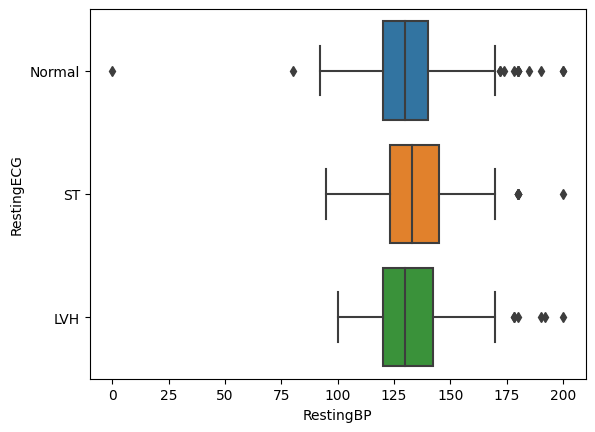

In [62]:
sns.boxplot(x=df['RestingBP'], y=df['RestingECG'])

<Axes: xlabel='Cholesterol', ylabel='ChestPainType'>

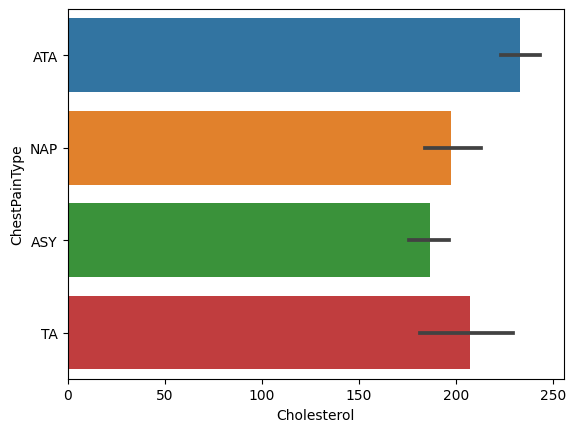

In [63]:
sns.barplot(x= df['Cholesterol'], y=df['ChestPainType'])

1. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

In [64]:
df[df.Cholesterol > df.Cholesterol.mean() + 3 * df.Cholesterol.std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [65]:
df1 = df[df['Cholesterol'] <= df['Cholesterol'].mean() + 3 * df['Cholesterol'].std()]
df1.shape

(915, 12)

In [66]:
df[df['MaxHR'] > df['MaxHR'].mean() + 3 * df['MaxHR'].std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [67]:
df[df['FastingBS'] > df['FastingBS'].mean() + 3 * df['FastingBS'].std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [68]:
df[df['Oldpeak'] > df['Oldpeak'].mean() + 3 * df['Oldpeak'].std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [69]:
df2 = df1[df1['Oldpeak'] <= df1['Oldpeak'].mean() + 3 * df1['Oldpeak'].std()]
df2.shape

(909, 12)

In [70]:
df[df['RestingBP'] > df['RestingBP'].mean() + 3 * df['RestingBP'].std()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [71]:
df3 = df2[df2['RestingBP'] <= df2['RestingBP'].mean() + 3 * df2['RestingBP'].std()]
df3.shape

(902, 12)

2. Convert text columns to numbers using label encoding and one hot encoding

In [72]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [73]:
print(f'ChestPain types: {df.ChestPainType.unique()}')
print(f'Resting ECGs : {df.RestingECG.unique()}')
print(f'ExerciseAnginas : {df.ExerciseAngina.unique()}')
print(f'ST Slopes : {df.ST_Slope.unique()}')

ChestPain types: ['ATA' 'NAP' 'ASY' 'TA']
Resting ECGs : ['Normal' 'ST' 'LVH']
ExerciseAnginas : ['N' 'Y']
ST Slopes : ['Up' 'Flat' 'Down']


We will be using **OneHotEncoding** for the converting categorical varibales into numerical

In [74]:
df4 = df3.copy()

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df4['RestingECG'] = le.fit_transform(df4['RestingECG'])
df4['ExerciseAngina'] = le.fit_transform(df4['ExerciseAngina'])
df4['ST_Slope'] = le.fit_transform(df4['ST_Slope'])
df4[['RestingECG', 'ExerciseAngina', 'ST_Slope']]

,RestingECG,ExerciseAngina,ST_Slope
0,1,0,2
1,1,0,1
2,2,0,2
3,1,1,1
4,1,0,2
...,...,...,...
913,1,0,1
914,1,0,1
915,1,1,1
916,0,0,1


Or we can use a manual method and to avoid dummy variable trap

In [76]:
df5 = df3.copy()

In [77]:
df5.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [78]:
df5['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [79]:
df5.RestingECG.replace({
    'Normal': 1,
    'ST': 2,
    'LVH': 3,
    }, 
    inplace=True,
)

In [80]:
df5['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [81]:
df5['ExerciseAngina'].replace({
    'N': 0,
    'Y': 1,
    },
    inplace=True
)

In [82]:
df5['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [85]:
df5['ST_Slope'].replace({
    'Down': 1,
    'Flat': 2,
    'Up': 3,
    },
    inplace=True
)

In [86]:
df5.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [88]:
df6 = pd.get_dummies(df5, drop_first=True, dtype=int)
df6.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,0,1,0,1,0


3. Apply scaling and split the data train test

In [90]:
X = df6.drop('HeartDisease', axis = 1)
y = df6.HeartDisease

X.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0


In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [93]:
print(X_train.shape)
print(X_test.shape)

(721, 13)
(181, 13)


4. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy

In [96]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = {
    'svc': SVC(),
    'log_reg': LogisticRegression(),
    'random_forest': RandomForestClassifier(),
}

for model, model_name in models.items():
    print(model_name.fit(X_train, y_train))
    print(model_name.score(X_test, y_test))

SVC()
0.8895027624309392
LogisticRegression()
0.8950276243093923
RandomForestClassifier()
0.8895027624309392


5. Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. 

In [97]:
X

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,1,132,0,1.2,2,1,0,0,1
914,68,144,193,1,1,141,0,3.4,2,1,0,0,0
915,57,130,131,0,1,115,1,1.2,2,1,0,0,0
916,57,130,236,0,3,174,0,0.0,2,0,1,0,0


In [98]:
X.shape

(902, 13)

In [101]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(902, 2)

In [102]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

In [103]:
models = {
    'svc': SVC(),
    'log_reg': LogisticRegression(),
    'random_forest': RandomForestClassifier(),
}

for model, model_name in models.items():
    print(model_name.fit(X_train_pca, y_train))
    print(model_name.score(X_test_pca, y_test))

SVC()
0.7679558011049724
LogisticRegression()
0.712707182320442
RandomForestClassifier()
0.7071823204419889
